### Submitted by:  SANTOSHI PATNAIK, (DS-2306)

## 4. Global Power Plant Database

## Project description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:

The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-> Here we can see the data set contains 907 rows and 27 columns.
->out of 27 columns  "primary_fuel" and "capacity_mw" ae target variables and remaining are input fetures which contribute towards the prediction
-> we can analize the target variable precisely

### traget variable "capacity_mw":


In [3]:
df.capacity_mw.max()                   #  -> we can see the largest power plant is of 4760 mw capacity

4760.0

In [4]:
df.loc[df.capacity_mw==4760]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
880,IND,India,VINDH_CHAL STPS,IND0000503,4760.0,24.0983,82.6719,Coal,Oil,NaN,...,2019.0,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority,NaN


->  We can see the largest power plants name is "VINDH_CHAL STPS" and the primary fuel for this is Coal and Other fuel is Oil

In [5]:
df.capacity_mw.min()                   # The dataset showing minimum size power plant is of capacity zero

0.0

In [6]:
df.loc[df.capacity_mw==0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
829,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-> the name of the smallest Power plant is "Tata BP - Electronics City Solar Panel Plant" which is operated with primary fuel "Solar energy"

# EDA

In [7]:
df.shape

(907, 27)

In [8]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [9]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

### Visualizing null Values through Heatmaps

<AxesSubplot:>

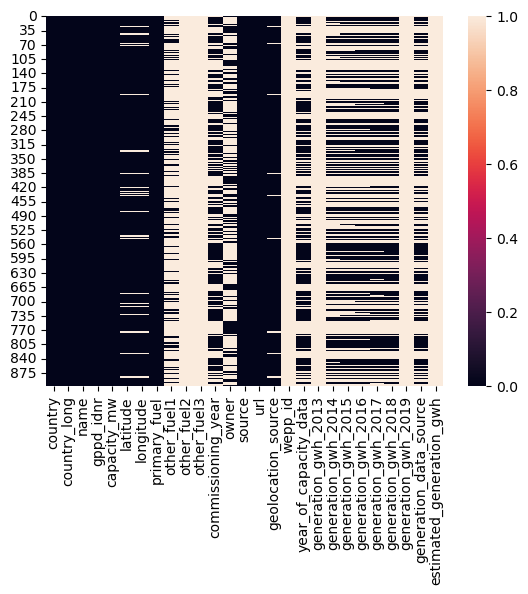

In [13]:
sns.heatmap(df.isnull())

##### We can see so many Null Vlues Present in the dataset.. so we have to treat the null values in the dataset

###### Droping the columns which has more than 90% of null values.. and also droping some of irrelevalent columns

### Observation:
"other_fuel3",'other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
'generation_gwh_2019','estimated_generation_gwh' these columns contains NILL data i.e empty columns.. so we can drop these columns

In [14]:
df.drop(['other_fuel3','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [15]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [16]:
### droping some of irrelevalent columns:
df.drop(['country','country_long','url','year_of_capacity_data','owner','generation_data_source','commissioning_year'],axis=1,inplace=True)


In [17]:
df.shape

(907, 14)

In [18]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In remaining columns we have to fill the missing values by replacing the null values by mean or mode according to the numerical or categorical columns

In [19]:
df.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [20]:
# replacing the null values in the numerical coumns by their mean() value
df["latitude"]=df["latitude"].fillna(df["latitude"].mean())
df["longitude"]=df["longitude"].fillna(df["longitude"].mean())
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean())
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean())
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean())
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean())
df["generation_gwh_2018"]=df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].mean())

In [21]:
# Replacing Null Values in Categorical columns with Mode() value
df["other_fuel1"]=df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"]=df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

<AxesSubplot:>

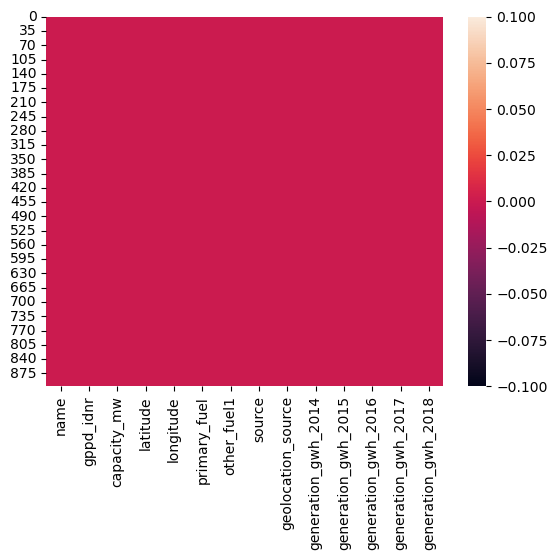

In [22]:
sns.heatmap(df.isnull())

In [23]:
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

### Statistical Summery:


In [24]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Obsevations:

1. Count of each column is same which shows no null values present in dataset
2. In "capacity_mw" mean is greater than median(50%), so the data is +vely skewed(right skewed)
3. In remaning columns the data is normaly distributed
4. Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.
5. Powerplants are located in latitude range of 8.1689 to 34.64 while longitudal range is 68.64 to 95.40.

# Data Visualization:

### Univariate Analysis:

In [25]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


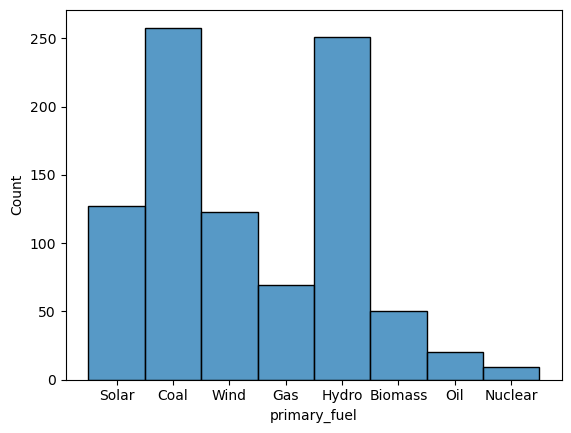

In [26]:
#visualizing the count of "Primary_fuel " column:
p=sns.histplot(x='primary_fuel',data=df)
print(df['primary_fuel'].value_counts())

#### observations:
1. Coal as Primay fuel based power plants are higher in numbers followed by "Hydro" based
2. Solar and wind as primary fuel plants are almost nearly equal in numbers
3. oil and nuclear primary fuel based power plants are least in count... among the two nuclear is the least one
4. overall we are having primary fuels such as: solar,coal,wind,Gas,Hydro,Biomass,Oil,Nuclear

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


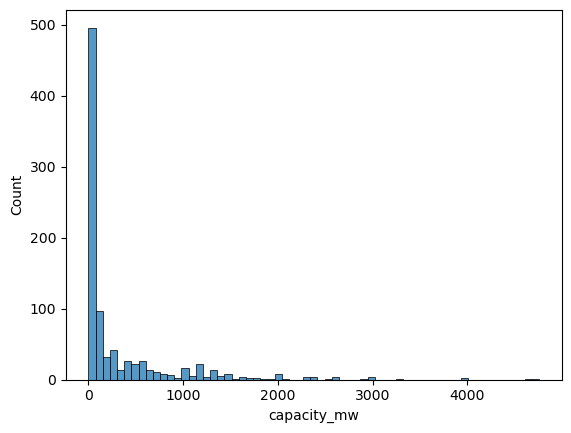

In [27]:
#visualizing the count of "Capacity_mw" column:
p=sns.histplot(x='capacity_mw',data=df)
print(df['capacity_mw'].value_counts())

### Observations: 
1. From the above plot we can visualize that Maximum number of power plants lies i the capacity range of 0 mw to 1500 mw only..
   afterwards the hogher capacity power plants are less in numbers

# BiVariate Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

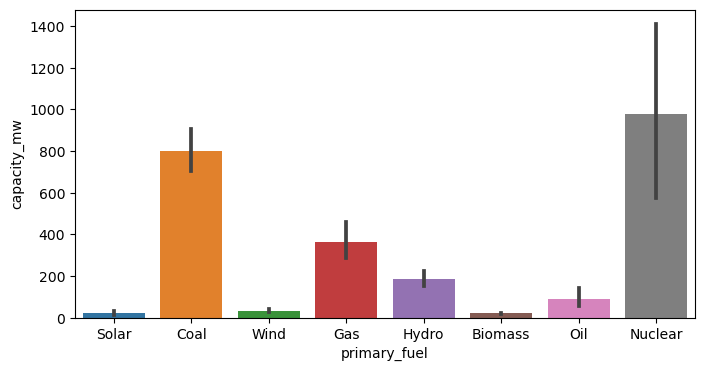

In [28]:
# Primary fuel vs capacity:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="capacity_mw", data=df)
plt.show

#### Observations:
1. Coal and Nuclear power plants are contributing toward more power generation.. 
2. Number of coal powerplants are highest as we seen before and also the power generation is high through Coal powerplants
3. as thouhgh the number of nuclear power plants are the least.. but the power generating through the nuclear power plants are very high which is contributing more towards the power generation
4. reamining "Gas:, "oil", and Hydro power plants are contributing moderately

#### year wise Power generation according to the primary fuel:

<function matplotlib.pyplot.show(close=None, block=None)>

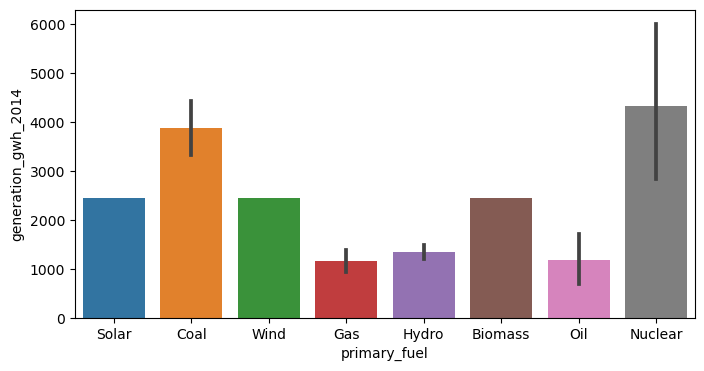

In [29]:
# Primary fuel vs generation_gwh_2014:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="generation_gwh_2014", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

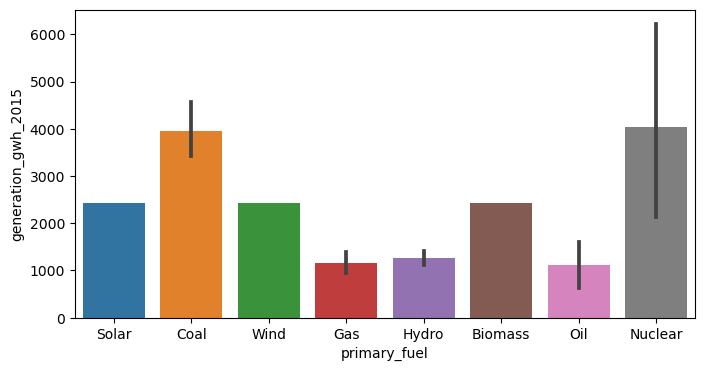

In [30]:
# Primary fuel vs generation_gwh_2015:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="generation_gwh_2015", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

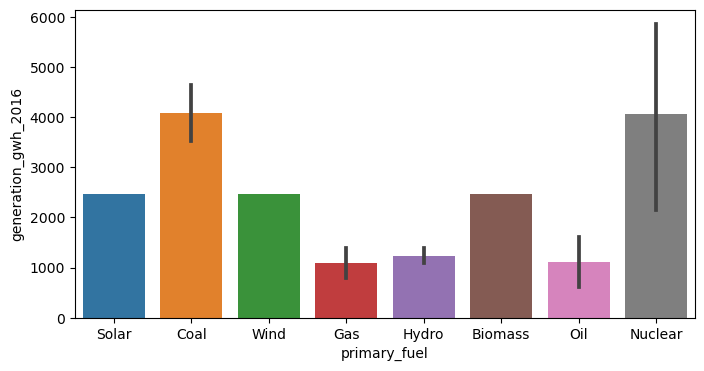

In [31]:
# Primary fuel vs generation_gwh_2016:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="generation_gwh_2016", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

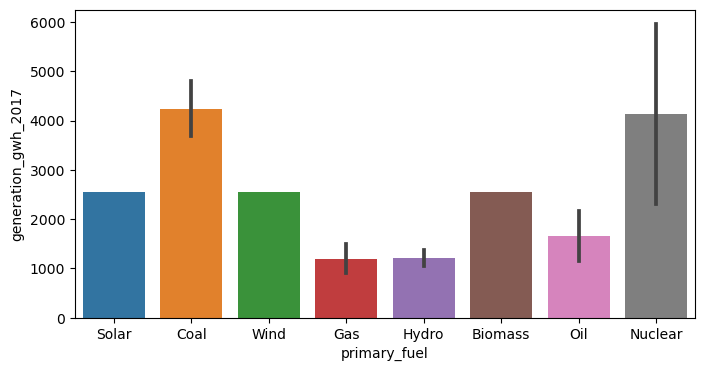

In [32]:
# Primary fuel vs generation_gwh_2017:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="generation_gwh_2017", data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

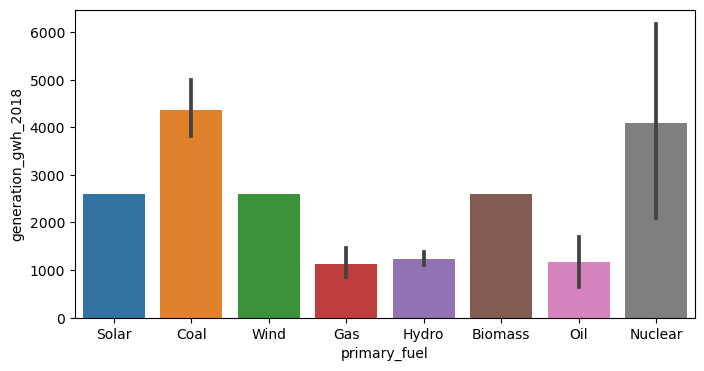

In [33]:
# Primary fuel vs generation_gwh_2018:
plt.figure(figsize=(8,4))
sns.barplot(x="primary_fuel", y="generation_gwh_2018", data=df)
plt.show

### Observations:
1. In all the years power generation through nuclear and coal based power plant is higher

### Pair plot

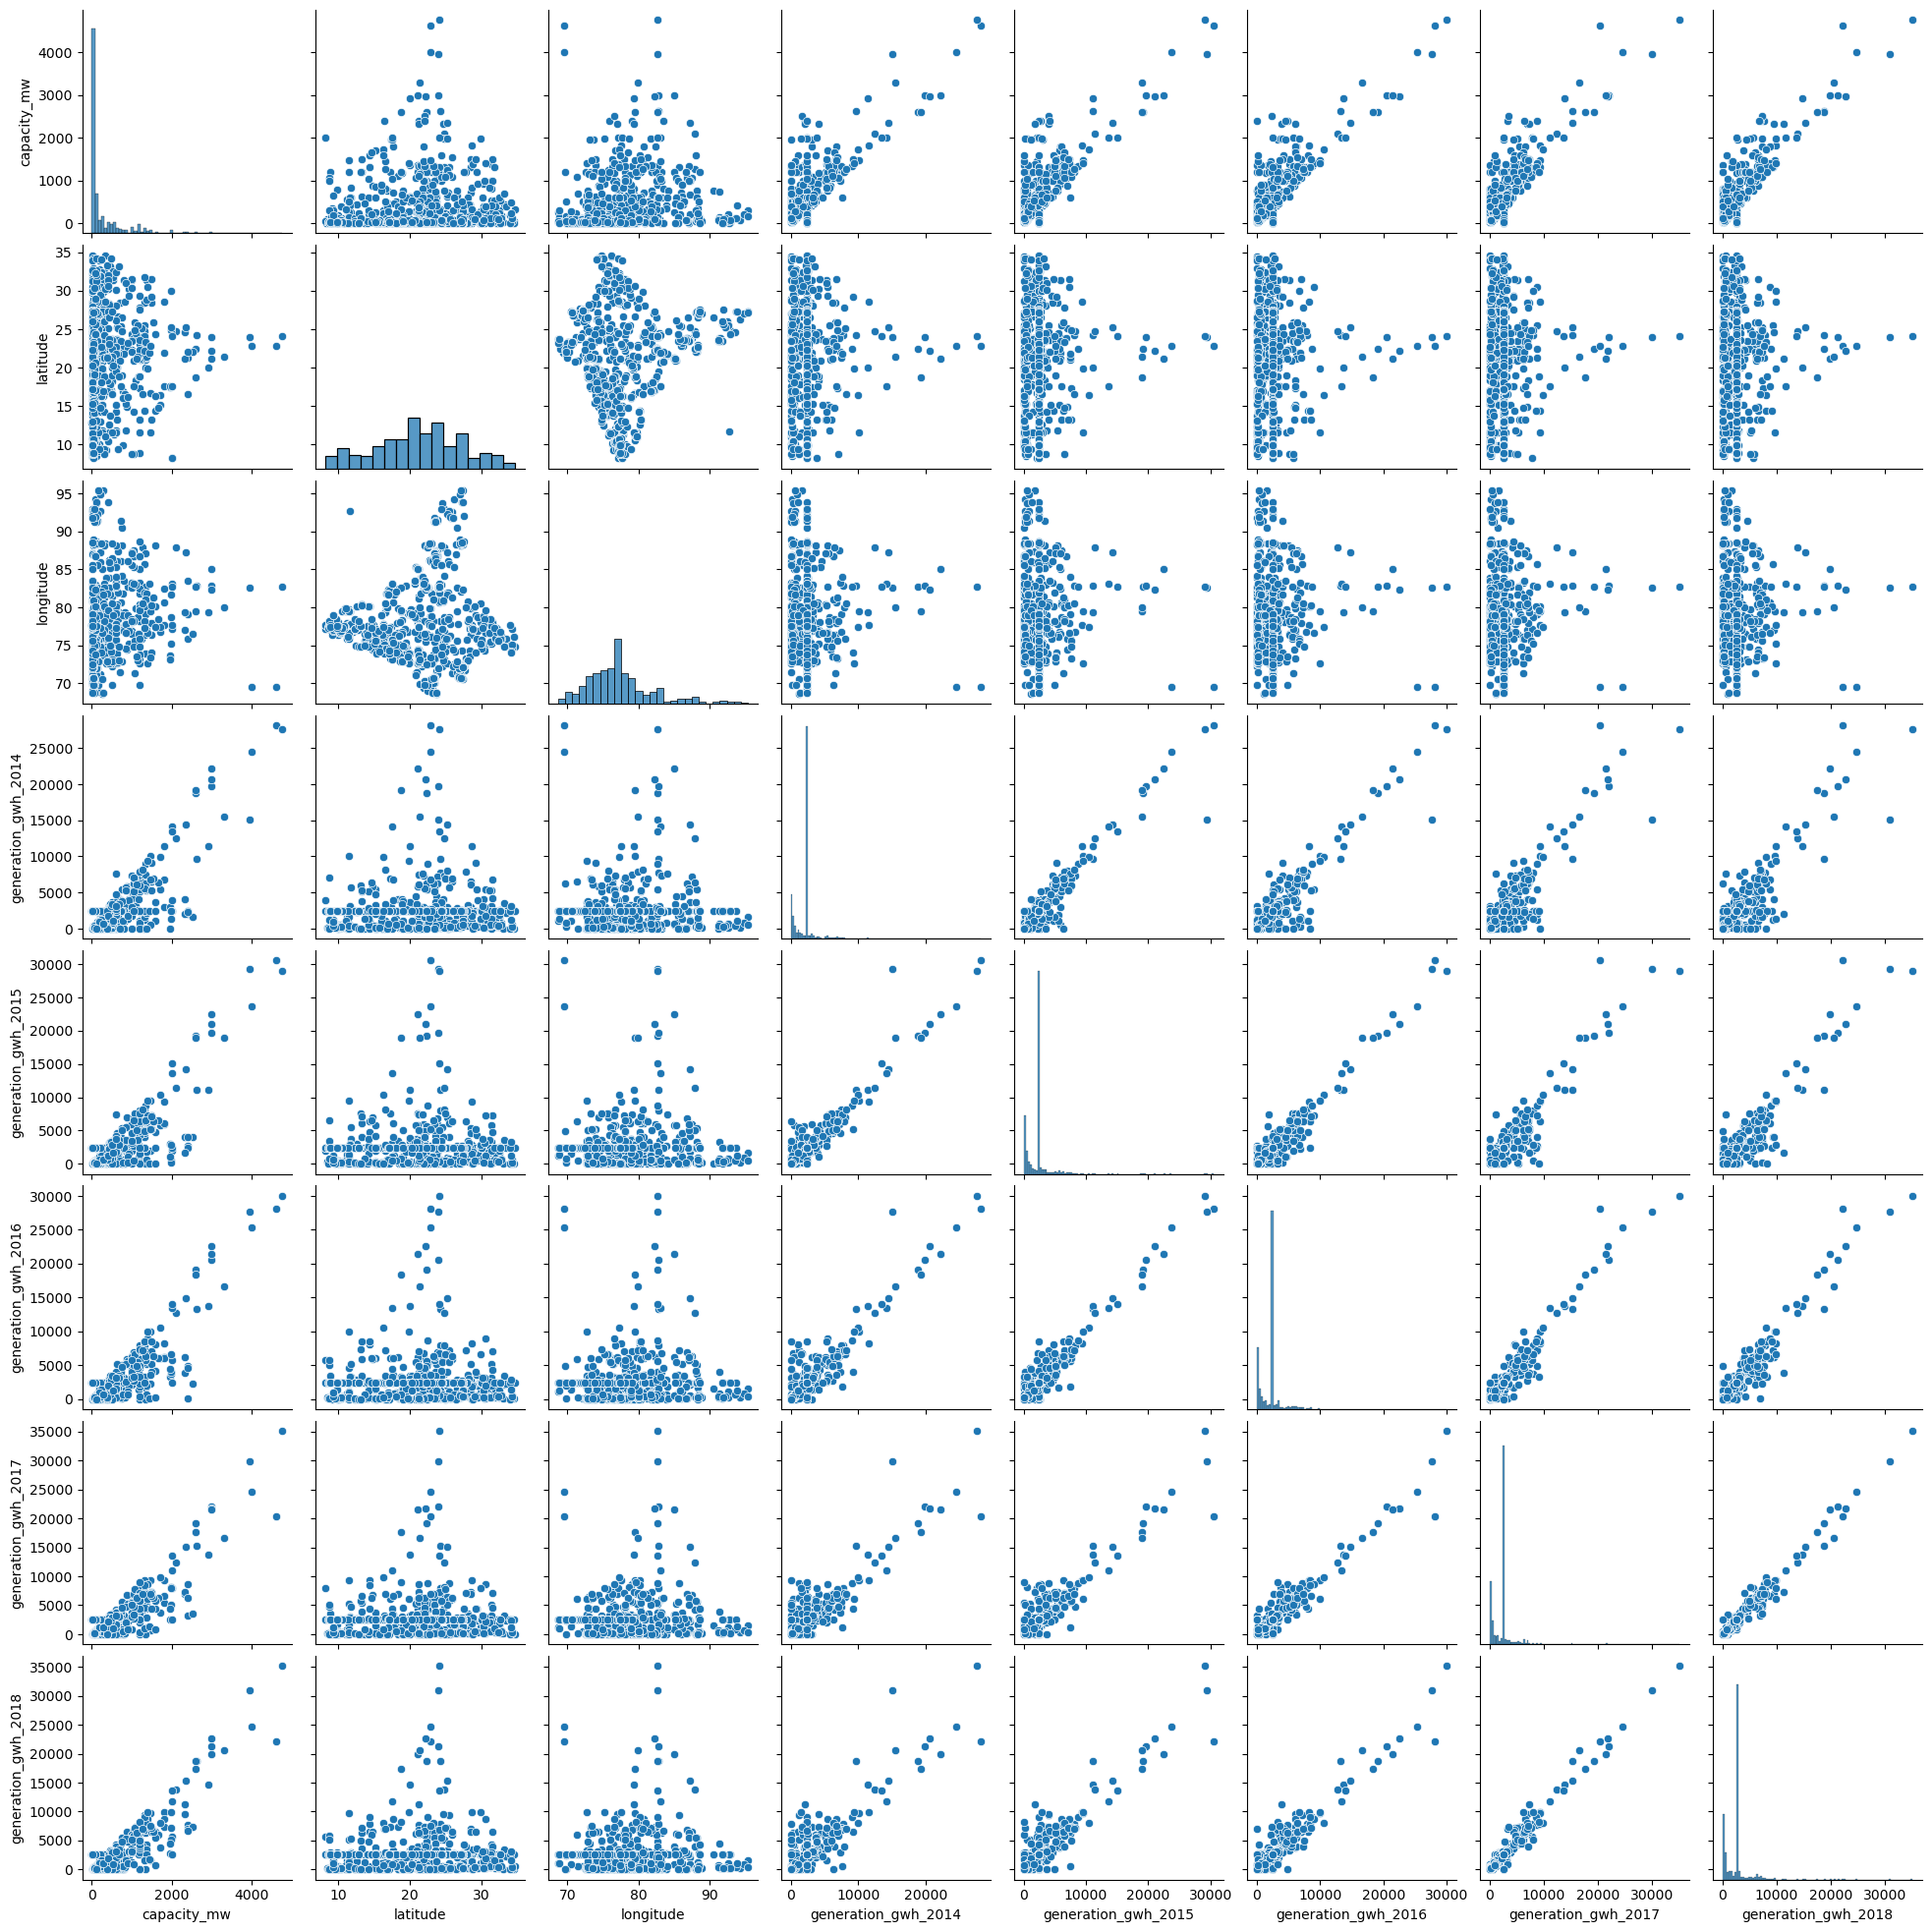

In [34]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

## Feature Engineering:


In [35]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))    
df       

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2.0,109.0,1.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,174.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2.0,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2.0,22.0,2.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2.0,77.0,0.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2.0,21.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2.0,59.0,2.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


## Outlier Detection:

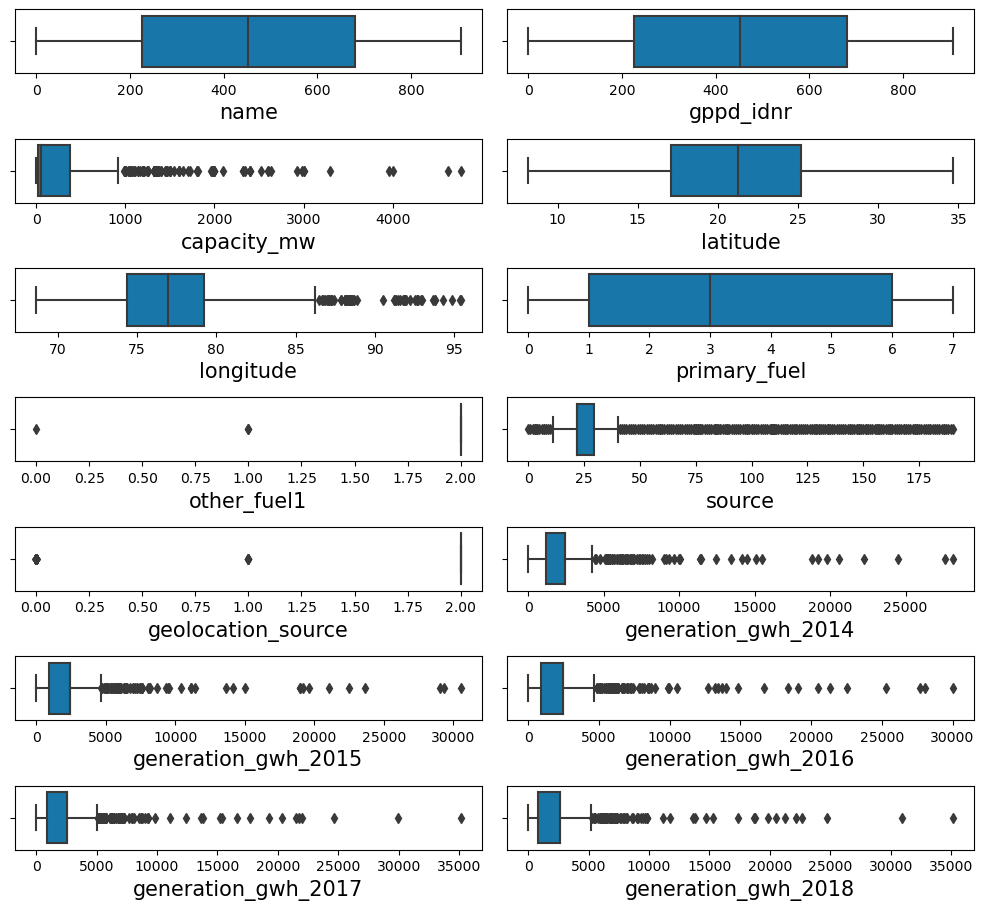

In [36]:
# checking for outliers
plt.figure(figsize=(10,10),facecolor="white")
plotnum=1
for i in df.columns:
    if plotnum<=14:
        p=plt.subplot(8,2,plotnum)
        sns.boxplot(df[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

In [37]:
#removing outliers:
#z-score method:
from scipy.stats import zscore
out_features=df[['capacity_mw','longitude','source','other_fuel1','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z=np.abs(zscore(out_features))
z

,capacity_mw,longitude,source,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.460215,0.054303,1.083349,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,2.917019,0.054303,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,0.512075,0.054303,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,0.489662,0.054303,0.394241,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,0.489662,0.054303,0.394241,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.022477,0.489662,0.054303,0.394241,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,0.145644,0.743019,0.054303,2.560940,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.391673,0.512075,0.054303,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.772866,0.339596,0.054303,0.394241,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [38]:
#threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 244, 299,
        308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 345, 360, 363,
        364, 364, 364, 364, 364, 364, 375, 416, 427, 482, 493, 493, 493,
        493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 546, 577,
        638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657,
        661, 669, 689, 695, 695, 695, 695, 695, 695, 721, 721, 721, 721,
        724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 767, 786,
        786, 786, 786, 786, 786, 788, 808, 808, 808, 808, 808, 808, 811,
        813, 817, 818, 832, 847, 870, 871, 879, 880, 880, 880, 880, 880,
        880, 895, 900], dtype=int64),
 array([0, 6, 7, 8, 9, 2, 2, 0, 5, 6, 7, 8, 9, 0, 5, 1, 1, 2, 0, 5, 6, 7,
        8, 9, 1, 2, 0, 5, 6, 7, 8, 9, 2, 1, 1, 1, 2, 1, 0, 0, 5, 6, 7, 8,
        9, 0, 1, 1, 0, 0, 5, 6, 7, 8, 9, 0, 5, 6, 7, 8, 9, 1, 1, 1, 1, 1,
        0,

In [39]:
# we have to removethese rows which have outliers:
df1=df[(z<3).all(axis=1)]
df1.shape          # after removing outliers the data frame size

(850, 14)

In [40]:
#originaldata frame size
df.shape

(907, 14)

In [41]:
#data loss percentage:
print("data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage 6.284454244762955


#### data loss percentage is affordable.. so we can proceed

In [42]:
#checking for skewness present in the data:
df1.skew()

name                   0.011331
gppd_idnr             -0.021353
capacity_mw            1.986256
latitude              -0.113145
longitude              0.920214
primary_fuel           0.427827
other_fuel1            0.000000
source                 1.815053
geolocation_source    -2.136239
generation_gwh_2014    1.509045
generation_gwh_2015    1.383739
generation_gwh_2016    1.406405
generation_gwh_2017    1.273176
generation_gwh_2018    1.313654
dtype: float64

In [43]:
df1['capacity_mw']=np.cbrt(df1['capacity_mw'])
df1['generation_gwh_2014']=np.sqrt(df1['generation_gwh_2014'])
df1['generation_gwh_2015']=np.sqrt(df1['generation_gwh_2015'])
df1['generation_gwh_2016']=np.sqrt(df1['generation_gwh_2016'])
df1['generation_gwh_2017']=np.sqrt(df1['generation_gwh_2017'])
df1['generation_gwh_2018']=np.sqrt(df1['generation_gwh_2018'])

In [44]:
df1.skew()

name                   0.011331
gppd_idnr             -0.021353
capacity_mw            0.845476
latitude              -0.113145
longitude              0.920214
primary_fuel           0.427827
other_fuel1            0.000000
source                 1.815053
geolocation_source    -2.136239
generation_gwh_2014   -0.453645
generation_gwh_2015   -0.416495
generation_gwh_2016   -0.375944
generation_gwh_2017   -0.406024
generation_gwh_2018   -0.381343
dtype: float64

In [45]:
from scipy.stats import boxcox
df1['source']=boxcox(df1['source'],0)
df1['geolocation_source']=boxcox(df1['geolocation_source'],0)

In [46]:
df1.skew()

name                   0.011331
gppd_idnr             -0.021353
capacity_mw            0.845476
latitude              -0.113145
longitude              0.920214
primary_fuel           0.427827
other_fuel1            0.000000
source                      NaN
geolocation_source          NaN
generation_gwh_2014   -0.453645
generation_gwh_2015   -0.416495
generation_gwh_2016   -0.375944
generation_gwh_2017   -0.406024
generation_gwh_2018   -0.381343
dtype: float64

In [47]:
df1.drop(['source','geolocation_source'],axis=1,inplace=True)

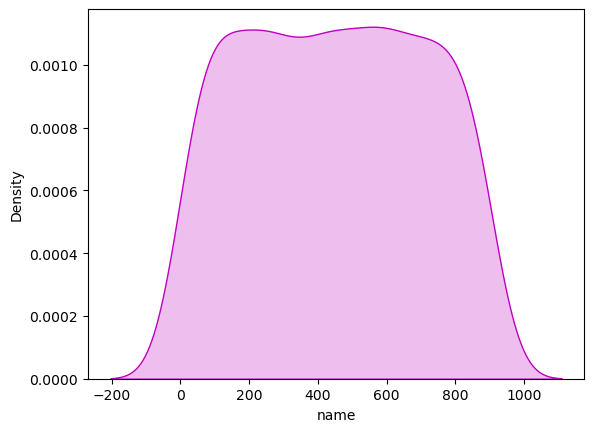

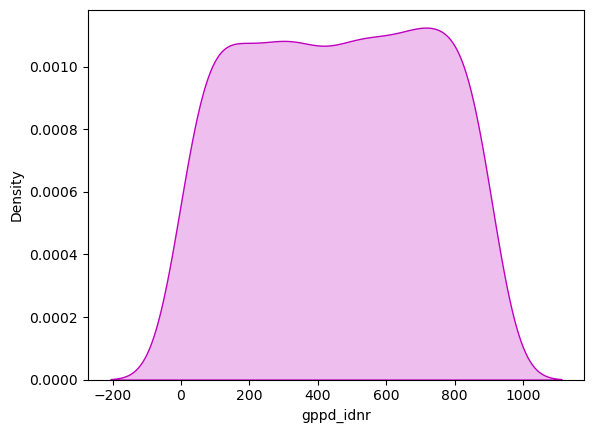

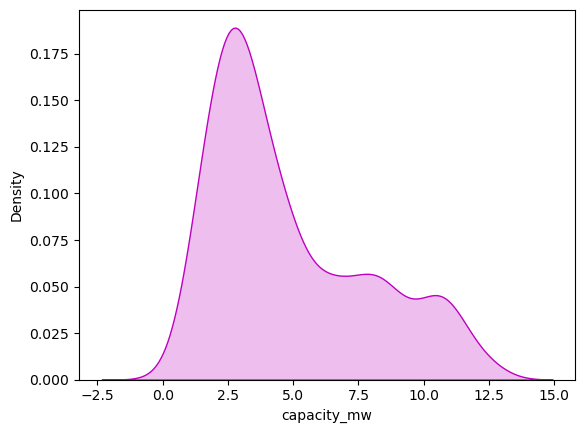

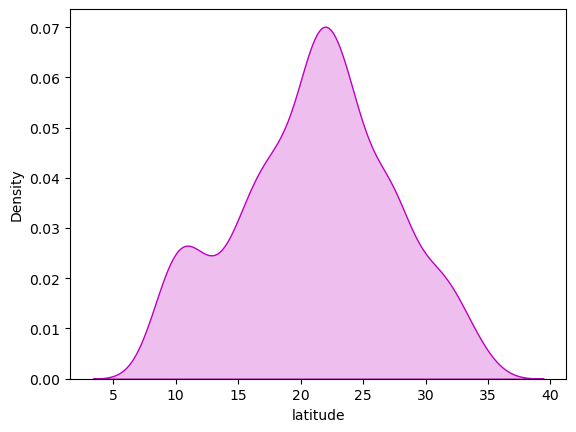

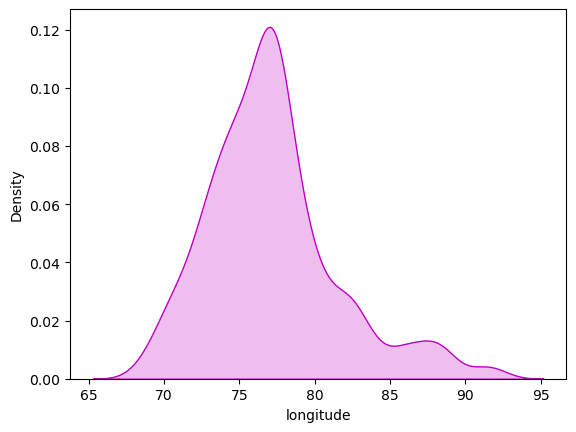

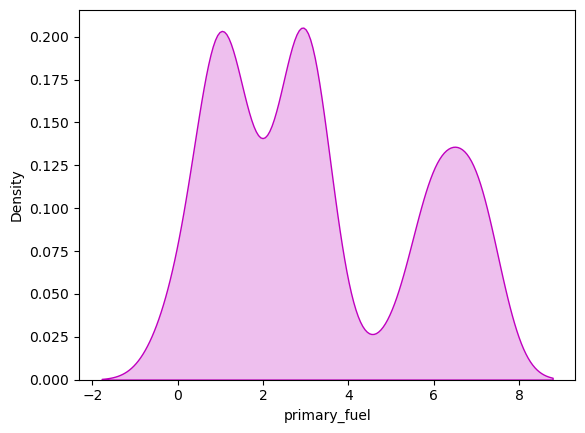

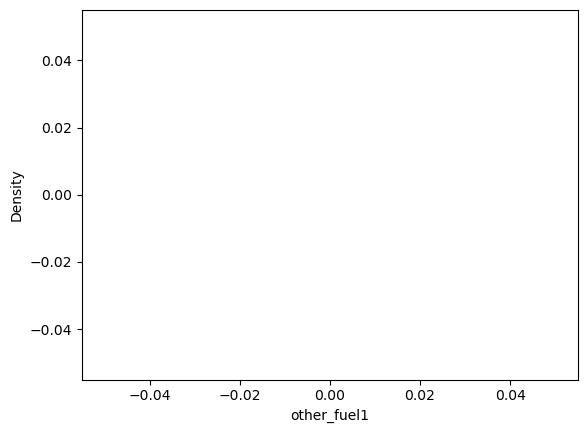

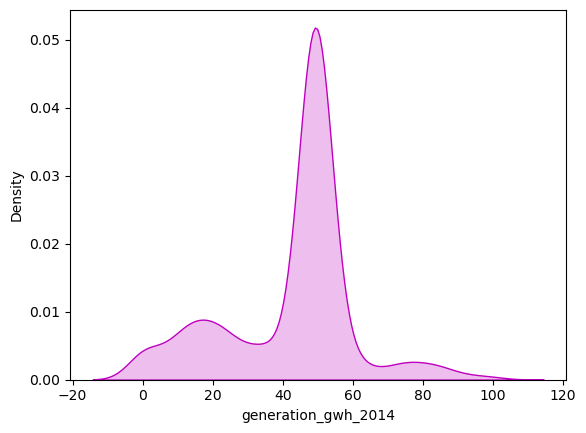

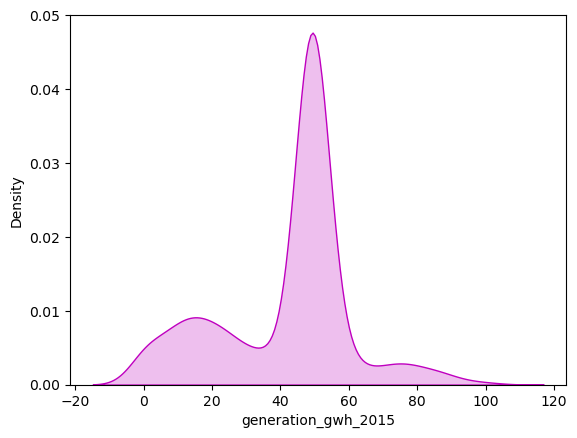

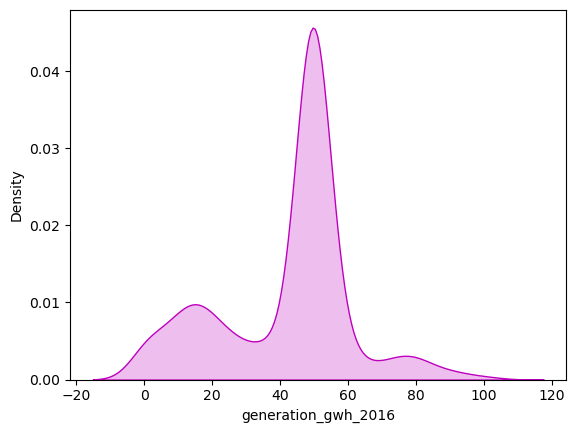

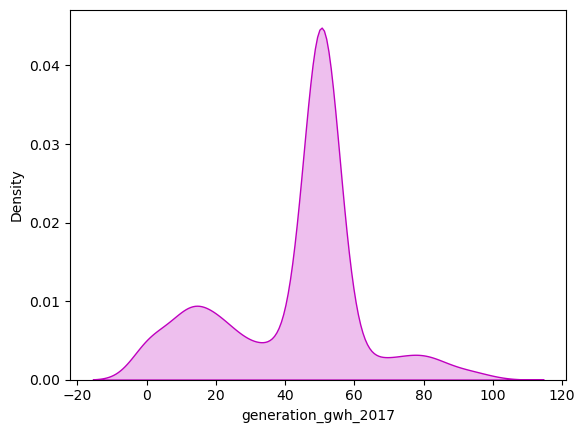

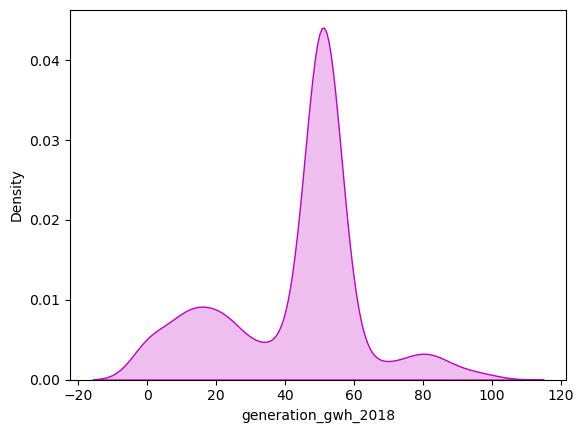

In [48]:
#visualizing the spreading of data
for i in df1.columns:
    sns.distplot(df1[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

### Correlation Martix:

In [49]:
corr=df1.corr()
corr

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.328457,0.015246,-0.146766,0.026387,0.046419,NaN,0.056855,0.030825,0.029988,0.046333,0.036431
gppd_idnr,0.328457,1.000000,-0.524584,-0.095901,-0.386661,0.617893,NaN,0.324989,0.328783,0.308156,0.295156,0.296642
capacity_mw,0.015246,-0.524584,1.000000,0.064571,0.320926,-0.502835,NaN,0.120981,0.111454,0.155734,0.155368,0.149175
latitude,-0.146766,-0.095901,0.064571,1.000000,-0.011244,-0.009819,NaN,0.058639,0.045282,0.051332,0.031500,0.036513
longitude,0.026387,-0.386661,0.320926,-0.011244,1.000000,-0.385535,NaN,-0.123085,-0.141711,-0.096296,-0.109935,-0.104133
primary_fuel,0.046419,0.617893,-0.502835,-0.009819,-0.385535,1.000000,NaN,0.059015,0.066280,0.052754,0.061565,0.062348
other_fuel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.056855,0.324989,0.120981,0.058639,-0.123085,0.059015,NaN,1.000000,0.864949,0.815588,0.755347,0.765448
generation_gwh_2015,0.030825,0.328783,0.111454,0.045282,-0.141711,0.066280,NaN,0.864949,1.000000,0.907037,0.808436,0.815411
generation_gwh_2016,0.029988,0.308156,0.155734,0.051332,-0.096296,0.052754,NaN,0.815588,0.907037,1.000000,0.906099,0.909212


In [50]:
df1.drop('other_fuel1',axis=1,inplace=True)

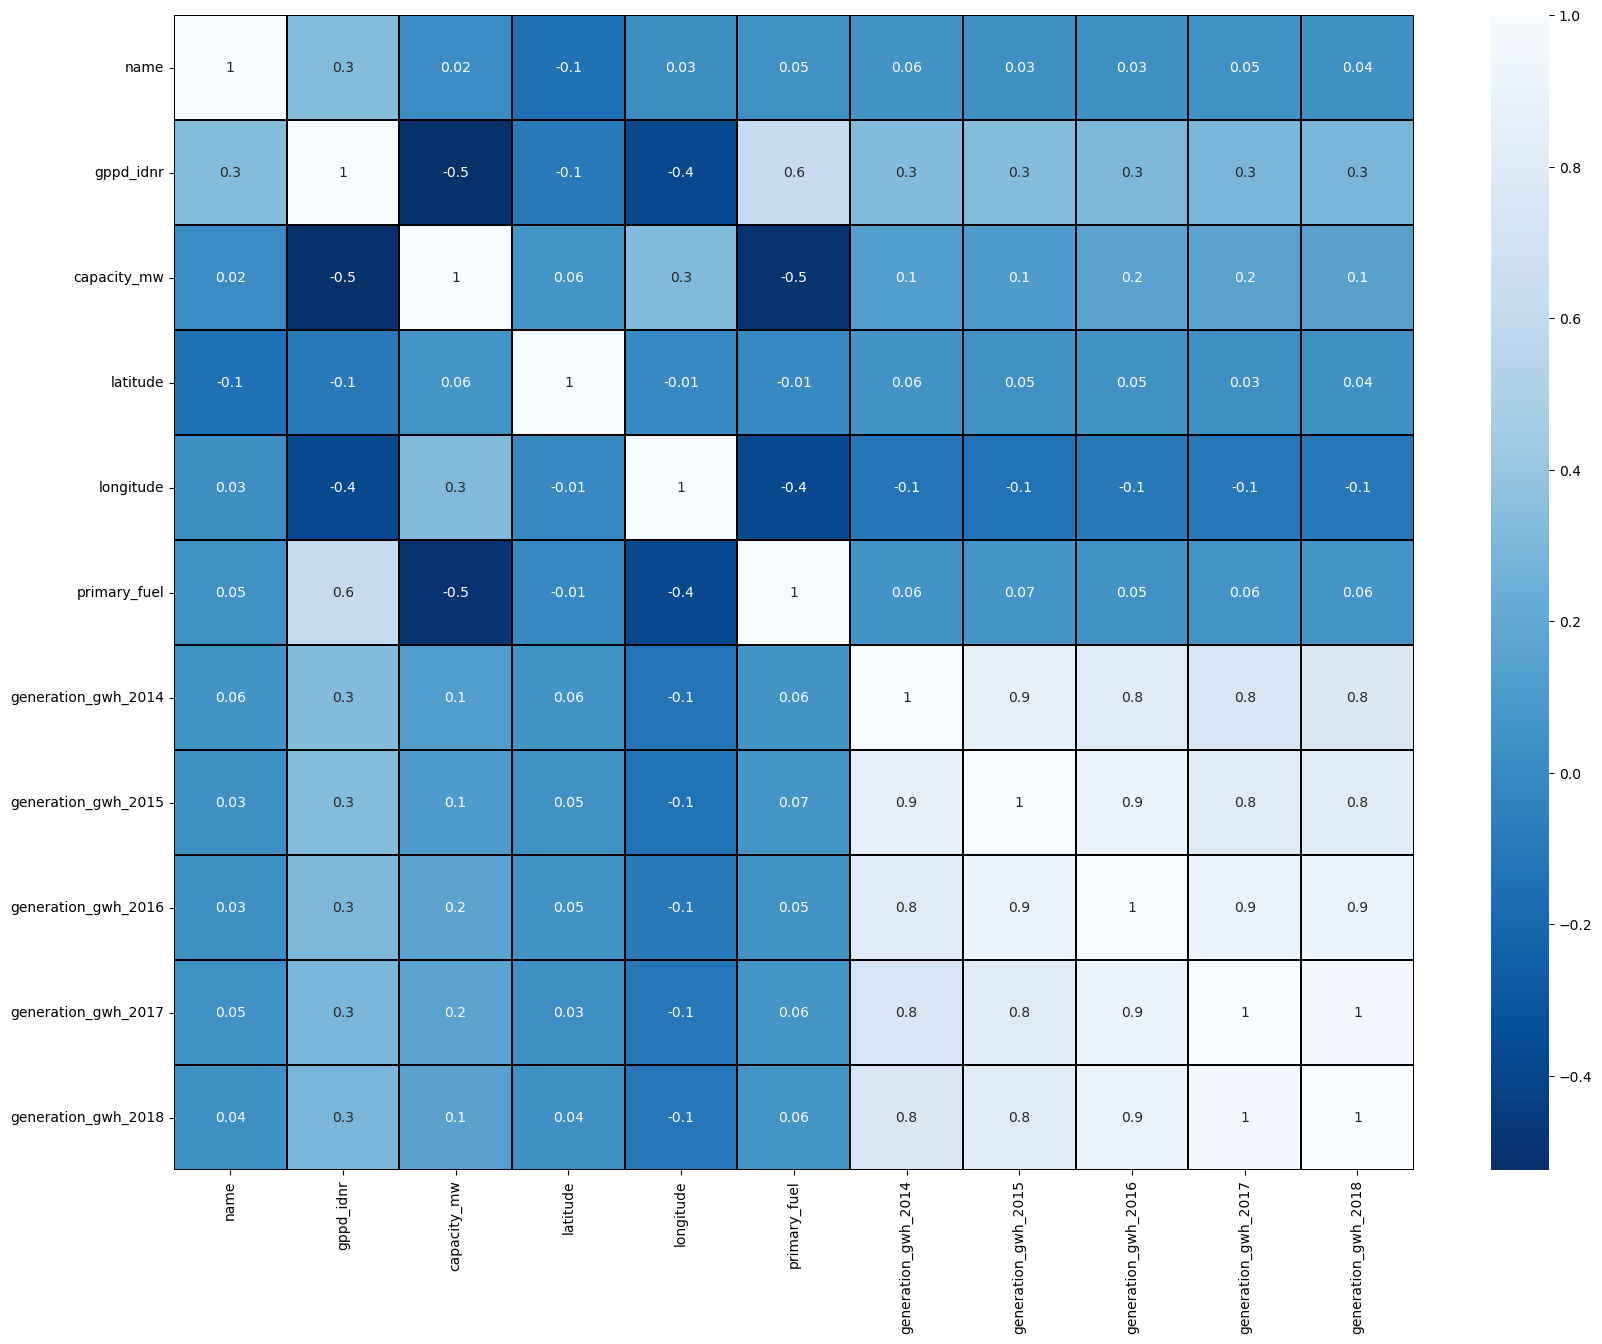

In [51]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

### Correlation with target variable "capacity_mw"

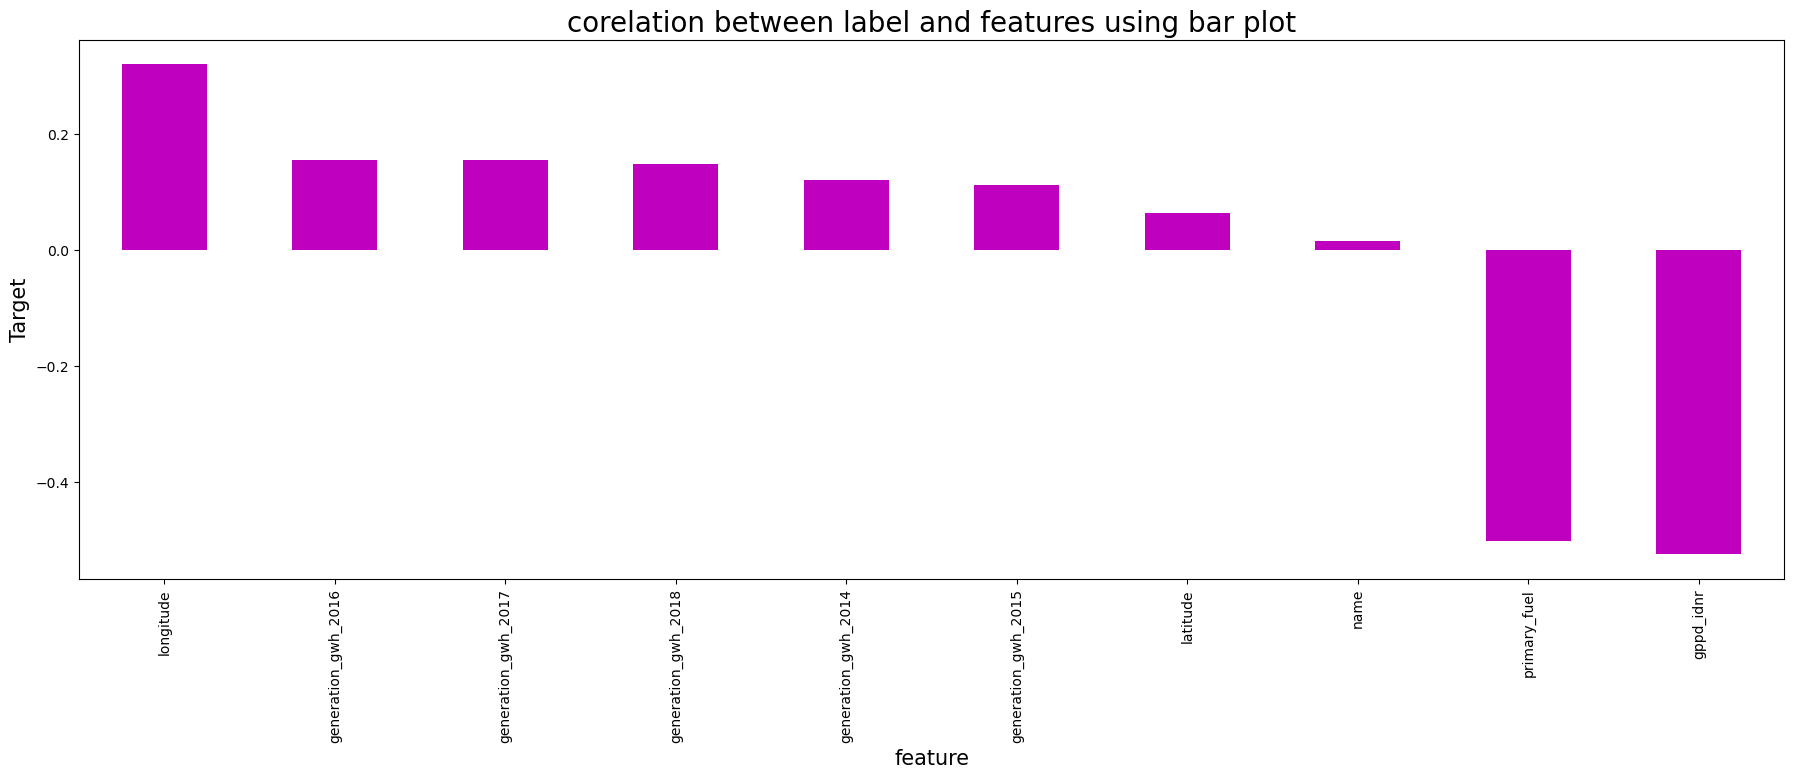

In [52]:
 #visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df1.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


### correlation with target variable "primary_fuel"

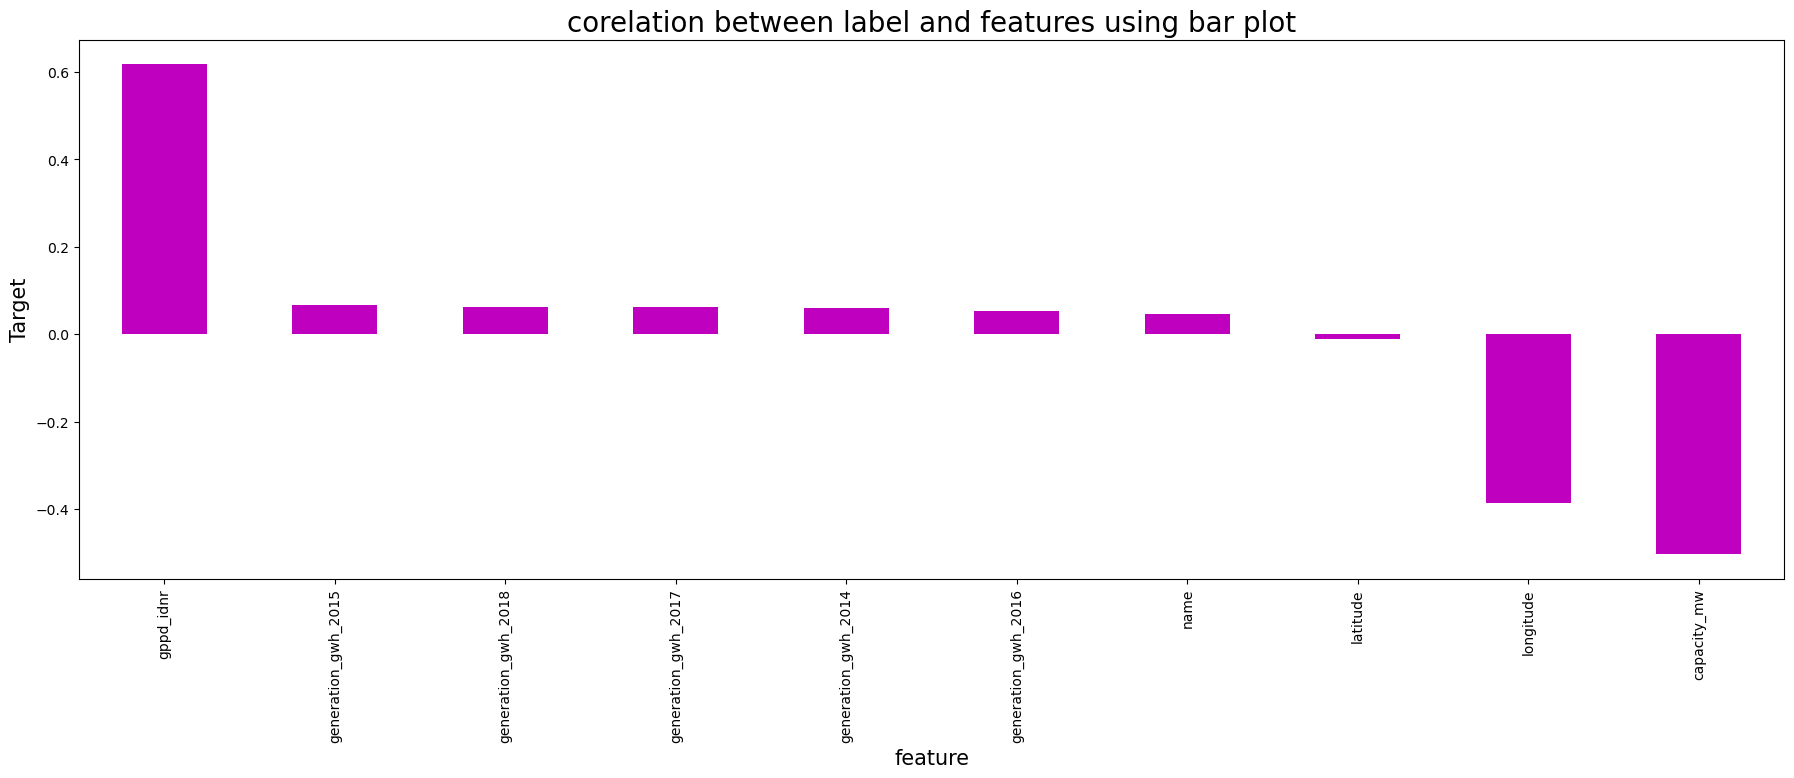

In [53]:
 #visualizing the corelation using barplot:
plt.figure(figsize=(22,7))
df1.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


In [54]:
# droping 'generation_gwh_2014' to 'generation_gwh_2018' to avoid multi colinearity:
df1.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)

In [55]:
df1.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel'],
      dtype='object')

In [56]:
df2=df1.copy()

# Analysis for Primary_fuel (Classification model)

In [57]:
#separating target variable and input variable

x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

In [58]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,name,gppd_idnr,capacity_mw,latitude,longitude
0,-1.715538,0.758198,-1.162016,1.146574,-0.898304
1,-1.711710,0.235954,-0.078589,0.593644,-0.581724
2,-1.707881,1.499937,-0.482702,0.130523,-1.793118
3,-1.704052,-1.728140,0.094418,0.448826,3.293962
4,-1.700223,-1.724355,2.437121,0.139664,1.222967
...,...,...,...,...,...
845,1.737997,0.129991,2.281151,-0.776936,0.054028
846,1.741826,1.382621,-1.133695,-1.327294,0.241112
847,1.745655,1.643744,-0.633770,-0.941815,-0.356811
848,1.749484,0.311642,-0.179020,0.526291,-0.781000


In [59]:
y.value_counts()

3.0    240
1.0    230
7.0    123
6.0    121
2.0     64
0.0     45
5.0     18
4.0      9
Name: primary_fuel, dtype: int64

In [60]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [61]:
# to balance the target variable data over sampling is performed:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [62]:
y1.value_counts()

6.0    240
1.0    240
7.0    240
2.0    240
3.0    240
0.0    240
5.0    240
4.0    240
Name: primary_fuel, dtype: int64

## modeling

In [63]:
#finding the best random state:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score


In [64]:
# Finding the best Random State:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum acc_score is",maxAcc, "on random_state",maxRs)        

maximum acc_score is 0.6395833333333333 on random_state 1


In [65]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 5)
(1440,)
(480, 5)
(480,)


In [66]:
#Logistic regression model:
logR=LogisticRegression()
logR.fit(x_train,y_train)
pred_train=logR.predict(x_train)
pred_Lgr=logR.predict(x_test)
print("predicted accuracy",accuracy_score(y_test,pred_Lgr))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_Lgr))
print(classification_report(y_test,pred_Lgr))


predicted accuracy 0.6395833333333333
accuracy score of original y_test data 0.5930555555555556
[[66  0  0  0  0  2  0  0]
 [ 6 23  5  3 15  4  2  0]
 [ 0 15 16  6 14  7  0  0]
 [ 4  7  3 25  6 12  0  0]
 [ 0  3  9  3 45  0  0  0]
 [ 9  1  4 10  0 38  0  0]
 [ 0  0  0  0  0  0 47  9]
 [ 6  0  0  0  0  0  8 47]]
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83        68
         1.0       0.47      0.40      0.43        58
         2.0       0.43      0.28      0.34        58
         3.0       0.53      0.44      0.48        57
         4.0       0.56      0.75      0.64        60
         5.0       0.60      0.61      0.61        62
         6.0       0.82      0.84      0.83        56
         7.0       0.84      0.77      0.80        61

    accuracy                           0.64       480
   macro avg       0.62      0.63      0.62       480
weighted avg       0.63      0.64      0.63       480



In [67]:
#DecissionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score of original y_test data 1.0
0.8895833333333333
[[64  4  0  0  0  0  0  0]
 [ 3 41  2  3  4  5  0  0]
 [ 0  4 51  2  1  0  0  0]
 [ 0  4  6 44  2  1  0  0]
 [ 0  3  2  1 54  0  0  0]
 [ 0  1  4  0  0 57  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  1 60]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        68
         1.0       0.72      0.71      0.71        58
         2.0       0.78      0.88      0.83        58
         3.0       0.88      0.77      0.82        57
         4.0       0.89      0.90      0.89        60
         5.0       0.90      0.92      0.91        62
         6.0       0.98      1.00      0.99        56
         7.0       1.00      0.98      0.99        61

    accuracy                           0.89       480
   macro avg       0.89      0.89      0.89       480
weighted avg       0.89      0.89      0.89       480



In [68]:
#RandomForestClassifier:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))


0.91875
[[64  3  0  0  0  1  0  0]
 [ 2 42  4  3  2  5  0  0]
 [ 0  2 53  2  1  0  0  0]
 [ 0  4  3 47  2  1  0  0]
 [ 0  0  2  0 58  0  0  0]
 [ 0  1  0  1  0 60  0  0]
 [ 0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0 61]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        68
         1.0       0.81      0.72      0.76        58
         2.0       0.85      0.91      0.88        58
         3.0       0.89      0.82      0.85        57
         4.0       0.92      0.97      0.94        60
         5.0       0.90      0.97      0.93        62
         6.0       1.00      1.00      1.00        56
         7.0       1.00      1.00      1.00        61

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



In [69]:
#KNeighborsClassifier:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


0.8375
[[68  0  0  0  0  0  0  0]
 [ 8 35  7  2  4  2  0  0]
 [ 0  4 52  0  1  1  0  0]
 [ 0  7  8 32  3  7  0  0]
 [ 0  0  0  0 60  0  0  0]
 [ 1  0  2  1  0 58  0  0]
 [ 1  0  0  0  0  0 49  6]
 [ 1  0  1  0  0  0 11 48]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        68
         1.0       0.76      0.60      0.67        58
         2.0       0.74      0.90      0.81        58
         3.0       0.91      0.56      0.70        57
         4.0       0.88      1.00      0.94        60
         5.0       0.85      0.94      0.89        62
         6.0       0.82      0.88      0.84        56
         7.0       0.89      0.79      0.83        61

    accuracy                           0.84       480
   macro avg       0.84      0.83      0.83       480
weighted avg       0.84      0.84      0.83       480



In [70]:
#GaussianNB:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))


0.68125
[[66  0  0  0  0  2  0  0]
 [ 3 29  5  1  8 12  0  0]
 [ 1 12 20 13  5  7  0  0]
 [ 0  2  4 26  8 17  0  0]
 [ 0  1  6  3 50  0  0  0]
 [13  0  3  3  0 43  0  0]
 [ 0  0  0  0  0  1 48  7]
 [ 2  0  0  0  0  6  8 45]]
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        68
         1.0       0.66      0.50      0.57        58
         2.0       0.53      0.34      0.42        58
         3.0       0.57      0.46      0.50        57
         4.0       0.70      0.83      0.76        60
         5.0       0.49      0.69      0.57        62
         6.0       0.86      0.86      0.86        56
         7.0       0.87      0.74      0.80        61

    accuracy                           0.68       480
   macro avg       0.68      0.67      0.67       480
weighted avg       0.68      0.68      0.67       480



## Cross Validating the Models:

In [71]:
score_LR=cross_val_score(logR,x1,y1)             # cross validation score for logistic regression
print(score_LR)
print(score_LR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_Lgr)-(score_LR.mean()))

[0.58854167 0.578125   0.5859375  0.62239583 0.56770833]
0.5885416666666667
diff b/w accuracy score and cross validation score is: 0.05104166666666654


In [72]:
score_dtc=cross_val_score(dtc,x1,y1)           #cross validation score of dtc
print(score_dtc)
print(score_dtc.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_dtc)-(score_dtc.mean()))

[0.80729167 0.84375    0.8671875  0.83072917 0.81510417]
0.8328125
diff b/w accuracy score and cross validation score is: 0.056770833333333326


In [73]:
score_RFC=cross_val_score(RFC,x1,y1)                           #cross validation score of RandomForest
print(score_RFC)
print(score_RFC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_RFC)-(score_RFC.mean()))

[0.859375   0.85677083 0.86458333 0.88020833 0.86979167]
0.8661458333333334
diff b/w accuracy score and cross validation score is: 0.05260416666666656


In [74]:
score_knn=cross_val_score(knn,x1,y1)                           #cross validation score of knn
print(score_knn)
print(score_knn.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_knn)-(score_knn.mean()))

[0.7734375  0.76822917 0.76041667 0.84114583 0.83333333]
0.7953125
diff b/w accuracy score and cross validation score is: 0.042187500000000044


In [75]:
score_gnb=cross_val_score(gnb,x1,y1)                           #cross validation score of GaussianNB
print(score_gnb)
print(score_gnb.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_gnb)-(score_gnb.mean()))

[0.56510417 0.62239583 0.65104167 0.64583333 0.5859375 ]
0.6140625
diff b/w accuracy score and cross validation score is: 0.06718750000000007


#### By varifying the accuracy score and cross validation score we can conclude that RANDOM FOREST CLASSIFIER is giving best prediction for the given problem statement.

# Hyperparameter Tuning of Random Forest Classifier

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [78]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [79]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 100}

In [80]:
modelGP=RandomForestClassifier(bootstrap=True,criterion='entropy', max_depth= 40, max_features='log2',n_estimators= 100)

# Final Model

In [81]:
#  Final Model:
modelGP.fit(x_train,y_train)
pred=modelGP.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.875


#### The Final model Providing 91.875% accuracy    

In [82]:
import joblib
joblib.dump(modelGP,'Global PowerPlant Primary fuel analysis')


['Global PowerPlant Primary fuel analysis']

In [83]:
RFC_GP=joblib.load('Global PowerPlant Primary fuel analysis')
predictionM=RFC_GP.predict(x_test)
predictionM

array([1., 1., 2., 7., 1., 2., 7., 3., 2., 1., 5., 2., 5., 0., 1., 7., 2.,
       0., 2., 6., 3., 4., 1., 4., 4., 7., 7., 6., 7., 2., 1., 7., 3., 0.,
       7., 4., 2., 0., 2., 5., 5., 7., 7., 1., 1., 2., 4., 6., 7., 2., 4.,
       6., 7., 3., 7., 3., 1., 1., 5., 3., 5., 6., 2., 3., 3., 2., 3., 6.,
       4., 5., 5., 0., 4., 6., 2., 0., 4., 4., 5., 7., 7., 5., 6., 3., 1.,
       1., 4., 5., 7., 2., 5., 7., 2., 5., 1., 4., 2., 3., 6., 1., 7., 6.,
       1., 0., 1., 4., 5., 6., 4., 5., 2., 3., 5., 7., 5., 0., 0., 6., 1.,
       1., 6., 2., 2., 2., 3., 5., 6., 2., 2., 4., 5., 2., 5., 0., 4., 3.,
       0., 2., 7., 7., 6., 5., 4., 4., 0., 0., 6., 7., 7., 6., 0., 2., 5.,
       5., 4., 7., 4., 0., 1., 6., 2., 4., 7., 6., 0., 5., 4., 7., 2., 2.,
       0., 1., 4., 0., 0., 5., 0., 2., 1., 4., 2., 4., 0., 0., 6., 4., 3.,
       1., 3., 1., 0., 1., 7., 5., 3., 7., 3., 7., 6., 3., 0., 4., 2., 6.,
       2., 0., 2., 3., 1., 5., 5., 0., 4., 6., 0., 0., 0., 6., 6., 6., 7.,
       4., 6., 1., 0., 3.

In [84]:
a=np.array(y_test)
DF_PrimaryFuel=pd.DataFrame()
DF_PrimaryFuel['predicted']=predictionM
DF_PrimaryFuel['original']=a
DF_PrimaryFuel

,predicted,original
0,1.0,1.0
1,1.0,2.0
2,2.0,2.0
3,7.0,7.0
4,1.0,1.0
...,...,...
475,5.0,5.0
476,0.0,0.0
477,3.0,3.0
478,3.0,3.0


## Capcity_mw Analysis  (regression Model)

In [85]:
df2.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel
0,0.0,657.0,1.357209,28.1839,73.2407,6.0
1,1.0,519.0,4.610436,24.7663,74.6090,1.0
2,2.0,853.0,3.396999,21.9038,69.3732,7.0
3,3.0,0.0,5.129928,23.8712,91.3602,2.0
4,4.0,1.0,12.164404,21.9603,82.4091,1.0


In [86]:
##separating target variable and input variable

x=df2.drop('capacity_mw',axis=1)
y=df2['capacity_mw']

In [87]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,name,gppd_idnr,latitude,longitude,primary_fuel
0,-1.715538,0.758198,1.146574,-0.898304,1.186074
1,-1.711710,0.235954,0.593644,-0.581724,-0.997042
2,-1.707881,1.499937,0.130523,-1.793118,1.622697
3,-1.704052,-1.728140,0.448826,3.293962,-0.560419
4,-1.700223,-1.724355,0.139664,1.222967,-0.997042
...,...,...,...,...,...
845,1.737997,0.129991,-0.776936,0.054028,-0.997042
846,1.741826,1.382621,-1.327294,0.241112,1.186074
847,1.745655,1.643744,-0.941815,-0.356811,1.622697
848,1.749484,0.311642,0.526291,-0.781000,-0.997042


In [88]:
y.value_counts()

1.709976     38
2.154435     20
8.434327     20
10.626586    19
2.466212     19
             ..
5.798890      1
8.640123      1
3.459395      1
2.596247      1
4.741536      1
Name: capacity_mw, Length: 337, dtype: int64

## Model Building:

In [89]:
#finding the best random state:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [90]:
# finding the best Random State:
maxAcc=0
maxRs=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum r2_score is",maxAcc, "on random_state",maxRs)        

maximum r2_score is 0.45256463578335215 on random_state 273


In [91]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(637, 5)
(637,)
(213, 5)
(213,)


In [92]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lr))
print('r2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score: 0.45256463578335215
r2_score on training Data: 31.635279650571434
mean absolute error: 1.8727452580417765
Mean Squared Error:- 5.426880823117932
Root Mean Squrared Error:- 2.3295666599429885


In [93]:
# Random Forest model:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.6128776715973814
R2_score on training Data: 93.84997185003418
mean absolute error: 1.3728890777546863
Mean Squared Error:- 3.837652584273883
Root Mean Squrared Error:- 1.9589927473765396


In [94]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.5485239565523622
R2_score on training Data: 63.78909476514529
mean absolute error: 1.5302441493534724
Mean Squared Error:- 4.475609071746985
Root Mean Squrared Error:- 2.115563535265955


In [95]:
# GBR
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.5844036151296117
R2_score on training Data: 79.65120290387478
mean absolute error: 1.444984364746833
Mean Squared Error:- 4.119923919123495
Root Mean Squrared Error:- 2.029759571753141


In [96]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.17693562047047773
R2_score on training Data: 14.37761334416139
mean absolute error: 2.396081894595754
Mean Squared Error:- 8.159268818615335
Root Mean Squrared Error:- 2.856443386208684


In [97]:
#Ridge:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('r2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ridge))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

r2_score: 0.4524064991647905
R2_score on training Data: 31.6352194648864
mean absolute error: 1.8728142159562426
Mean Squared Error:- 5.428448475920072
Root Mean Squrared Error:- 2.3299031044058616


In [98]:
#etr
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_etr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_etr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))


r2_score: 0.5940181217522617
R2_score on training Data: 100.0
mean absolute error: 1.3908533067624744
Mean Squared Error:- 4.024612609287197
Root Mean Squrared Error:- 2.006143716010196


# Cross Validating the models:

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
scoreLR=cross_val_score(LR,x,y,cv=4,scoring='r2')             #CROSS VALIDATION FOR LINEAR REGRESSOR
print(scoreLR)
print(scoreLR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lr)-scoreLR.mean())*100)

[0.35297934 0.35012242 0.35017623 0.31514929]
0.3421068167080682
difference between r2 score and cross validation score is: 11.045781907528395


In [101]:
scoreRFR=cross_val_score(RFR,x,y,cv=4,scoring='r2')        #CROSS VALIDATION FOR RANDOM FOREST
print(scoreRFR)
print(scoreRFR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_RFR)-scoreRFR.mean())*100)

[0.59651607 0.50340338 0.62677109 0.55347534]
0.570041469166103
difference between r2 score and cross validation score is: 4.283620243127839


In [102]:
scoreknn=cross_val_score(knn,x,y,cv=4,scoring='r2')            # CROSS VALIDATION FOR KNN
print(scoreknn)
print(scoreknn.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_knn)-scoreknn.mean())*100)

[0.46419346 0.3358373  0.45490617 0.42357581]
0.41962818137125224
difference between r2 score and cross validation score is: 12.889577518110995


In [103]:
scoreGBR=cross_val_score(GBR,x,y,cv=4,scoring='r2')             #cross validation for gbr
print(scoreGBR)
print(scoreGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_GBR)-scoreGBR.mean())*100)

[0.49566635 0.50374813 0.55408504 0.52810957]
0.5204022715249546
difference between r2 score and cross validation score is: 6.400134360465715


In [104]:
scoreL=cross_val_score(lasso,x,y,cv=4,scoring='r2')            #cross validation for lasso
print(scoreL) 
print(scoreL.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lasso)-scoreL.mean())*100)

[0.21844348 0.18701993 0.16887931 0.13286387]
0.17680164733803466
difference between r2 score and cross validation score is: 0.013397313244306597


In [105]:
scoreR=cross_val_score(ridge,x,y,cv=4,scoring='r2')          #cross validation for ridge
print(scoreR)
print(scoreR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_ridge)-scoreR.mean())*100)

[0.35359476 0.35013129 0.35008678 0.31511809]
0.34223272828839046
difference between r2 score and cross validation score is: 11.017377087640002


In [106]:
scoreETR=cross_val_score(etr,x,y,cv=4,scoring='r2')             #cross validation for ETR
print(scoreETR)
print(scoreETR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_etr)-scoreETR.mean())*100)

[0.53527617 0.54836678 0.66079494 0.53053143]
0.5687423273586442
difference between r2 score and cross validation score is: 2.527579439361749


by varifying the r2 score and cross validation score we can conclude that Random Foresr regressor best suits for the Capacity analysis of the given problem

##  Hyperparameter Tuning Random forest Regressor:

In [107]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
    }

GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=4)
GCV.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]})

In [108]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [109]:
modelGP2=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=2,min_samples_leaf=3,min_samples_split= 10,n_estimators=100)

## Final Model2

In [110]:
modelGP2.fit(x_train,y_train)
pred=modelGP2.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

61.48428269118339


###### The final model for Capacity prediction is providing 61.48% accuracy

#### Saving the model:

In [111]:
import joblib
joblib.dump(modelGP2,"Global Power Plant Capacity prediction Analyis")


['Global Power Plant Capacity prediction Analyis']

In [112]:
RFR_capacity=joblib.load("Global Power Plant Capacity prediction Analyis")
predictionM=RFR_capacity.predict(x_test)
predictionM

array([10.03931712,  2.87389278,  5.77353031,  2.98680389,  8.77463404,
        4.2204322 ,  5.68069437,  9.40377918,  2.35771353,  3.73056976,
        3.57090978,  2.6845061 ,  5.22301011,  4.72513744,  3.69054107,
        8.92002574,  2.70985749,  4.09798514,  2.63322496,  7.1105493 ,
        9.35614574,  5.42243076,  3.47048263,  4.83644162,  4.4795727 ,
        3.50457676,  2.62042993,  4.52697355,  1.83569991,  7.80691553,
        4.84677386,  2.42698864,  8.15874285,  2.89695934,  2.2491972 ,
        3.27378268,  8.45423484,  3.40684711,  2.34265082,  4.1551673 ,
        6.99053176,  4.53741861,  9.22786732,  9.5506674 ,  2.40765482,
        8.12774224,  2.60585263,  2.74252566,  2.06065144,  8.52943705,
        1.53954192,  1.86449104,  4.89043833,  5.61272161,  5.0475494 ,
        5.61292341,  2.25658239,  2.40620615,  4.08139153,  3.7145073 ,
        1.94480707,  7.54022879,  2.64096386,  3.15345967,  5.15907701,
        2.26959278,  2.8678556 ,  3.08585633,  3.86802679,  3.98

In [113]:
a=np.array(y_test)
DF_capacity=pd.DataFrame()
DF_capacity['predicted']=predictionM
DF_capacity['original']=a
DF_capacity

,predicted,original
0,10.039317,8.962809
1,2.873893,2.924018
2,5.773530,4.217163
3,2.986804,1.817121
4,8.774634,11.816658
...,...,...
208,3.590426,4.217163
209,2.030578,2.924018
210,1.939243,1.709976
211,2.695809,1.310371
